# **PROJECT TITLE  -  ZOMATO BANGALORE RESTAURANTS**

## **1. Importing Libraries**

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.metrics import mean_squared_error




## **2. Loading Dataset**

In [265]:
df=pd.read_csv(r"C:\Users\Sheenu\Desktop\Zomato\zomato.csv")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


## **3. Data Pre-Processing**

**1. Shape (Rows & Columns)**

In [266]:
df.shape

(51717, 17)

**2. Checking for null values**

In [267]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Note : This dataset contains missing values, so we should either drop the affected columns or fill the missing entries.

**Dropping the columns**

In [268]:

df.drop('url',axis=1, inplace=True)


In [269]:
df.drop('menu_item',axis=1, inplace=True)
df


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


**Filling the columns**

In [270]:
df.columns = df.columns.str.strip()
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
#df['rate']=df['rate'].fillna(df['rate'].mean())
df = df.dropna(subset=['rate'])

#approx_cost(for two people)
df['approx_cost(for two people)']=df['approx_cost(for two people)'].fillna("Unknown")
df['phone']=df['phone'].fillna("Unknown")
df['location']=df['location'].fillna("Unknown")
df['rest_type']=df['rest_type'].fillna("Unknown")

df['cuisines']=df['cuisines'].fillna("Unknown")
df['dish_liked']=df['dish_liked'].fillna("Unknown")
df

C:\Users\Sheenu\AppData\Local\Temp\ipykernel_4288\3287198475.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_cost(for two people)']=df['approx_cost(for two people)'].fillna("Unknown")
C:\Users\Sheenu\AppData\Local\Temp\ipykernel_4288\3287198475.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phone']=df['phone'].fillna("Unknown")
C:\Users\Sheenu\AppData\Local\Temp\ipykernel_4288\3287198475.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",Unknown,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,Unknown,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [271]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

**After dropping the necessary columns and filling the remaining ones, all missing values are now handled.**

**3. info**

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41665 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      41665 non-null  object 
 1   name                         41665 non-null  object 
 2   online_order                 41665 non-null  object 
 3   book_table                   41665 non-null  object 
 4   rate                         41665 non-null  float64
 5   votes                        41665 non-null  int64  
 6   phone                        41665 non-null  object 
 7   location                     41665 non-null  object 
 8   rest_type                    41665 non-null  object 
 9   dish_liked                   41665 non-null  object 
 10  cuisines                     41665 non-null  object 
 11  approx_cost(for two people)  41665 non-null  object 
 12  reviews_list                 41665 non-null  object 
 13  listed_in(type)      

**4. Checking for duplicate values**

In [273]:
df.duplicated().value_counts()

False    41636
True        29
Name: count, dtype: int64

Note: There are 47 duplicate entries in this dataset, so all duplicates were removed.

In [274]:
df.drop_duplicates(inplace=True)
df


C:\Users\Sheenu\AppData\Local\Temp\ipykernel_4288\576731425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",Unknown,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,Unknown,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [275]:
df.duplicated().value_counts()

False    41636
Name: count, dtype: int64

## **Data Visualization (EDA)**

### **1. Top 10 most rated Restaurants in Banglore**

In [276]:
df['name'] = df['name'].replace(
    'SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine',
    'SantaSpaCuisine'
)

C:\Users\Sheenu\AppData\Local\Temp\ipykernel_4288\4187861488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].replace(


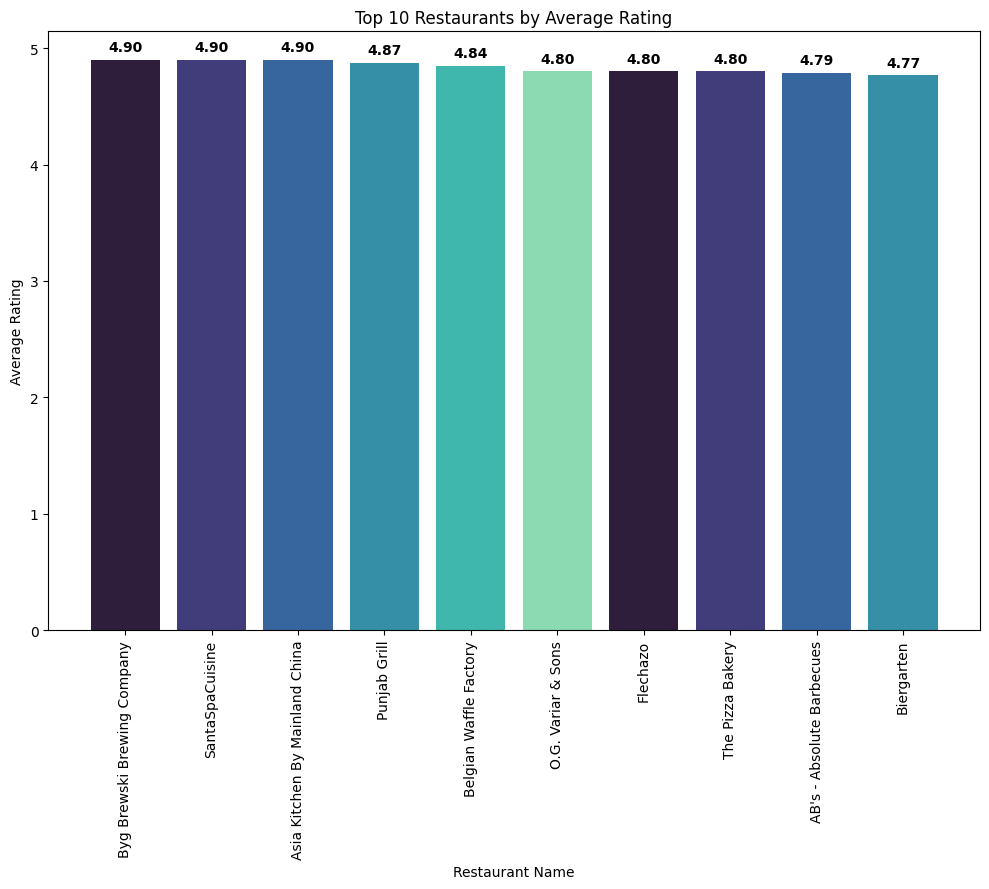

In [277]:
top10 = df.groupby('name')['rate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,9))

# Plot bar chart first
colors = sns.color_palette("mako")
plt.bar(top10.index, top10.values, color=colors)

# Add text labels above each bar
for index, value in enumerate(top10.values):
    plt.text(index, value + 0.05, 
             f"{value:.2f}", #value → the number you want to display

                             #:.2f → format the number as a floating-point value with 2 decimal places
             ha='center', 
             va='bottom',
             fontsize=10,
             fontweight='bold')

plt.xticks(rotation=90)
plt.xlabel("Restaurant Name")
plt.ylabel("Average Rating")
plt.title("Top 10 Restaurants by Average Rating")
plt.tight_layout()
plt.show()





### **2. Most Affordable Restaurants in Banglore**

In [278]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace("Unknown", None)
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '')   # remove commas
)

df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
#Drop rows where cost is still missing
df = df.dropna(subset=['approx_cost(for two people)'])

C:\Users\Sheenu\AppData\Local\Temp\ipykernel_4288\1012631445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace("Unknown", None)
C:\Users\Sheenu\AppData\Local\Temp\ipykernel_4288\1012631445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_cost(for two people)'] = (
C:\Users\Sheenu\AppData\Local\Temp\ipykernel_4288\1012631445.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [279]:


aff= (
    df.groupby('name')['approx_cost(for two people)']
      .min()
      .sort_values(ascending=True)
      .head(5)
)

print(aff)

name
Srinidhi Sagar Food Line    40.0
Srinidhi Sagar              40.0
Srinidhi Sagar Deluxe       40.0
Savera Cafe                 50.0
Nellore Dosa Camp           70.0
Name: approx_cost(for two people), dtype: float64


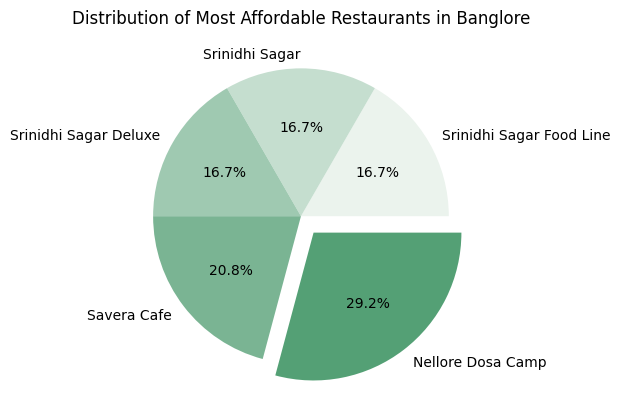

In [280]:

colors =sns.light_palette("seagreen")
explode=[0.0,0.0,0.0,0.0,0.14]  # Used to project the highest count
plt.pie(aff.values, labels=aff.index, autopct="%1.1f%%",colors=colors,explode=explode)

plt.title("Distribution of Most Affordable Restaurants in Banglore")
plt.show()


### **3. Most Expensive Restaurants in Banglore**

In [281]:
exp= (
    df.groupby('name')['approx_cost(for two people)']
      .min()
      .sort_values(ascending=False)
      .head(5)
)

print(exp)

name
Le Cirque Signature - The Leela Palace    6000.0
Royal Afghan - ITC Windsor                5000.0
Malties - Radisson Blu                    4500.0
La Brasserie - Le Meridien                4100.0
Grill 99 - The Ritz-Carlton               4000.0
Name: approx_cost(for two people), dtype: float64


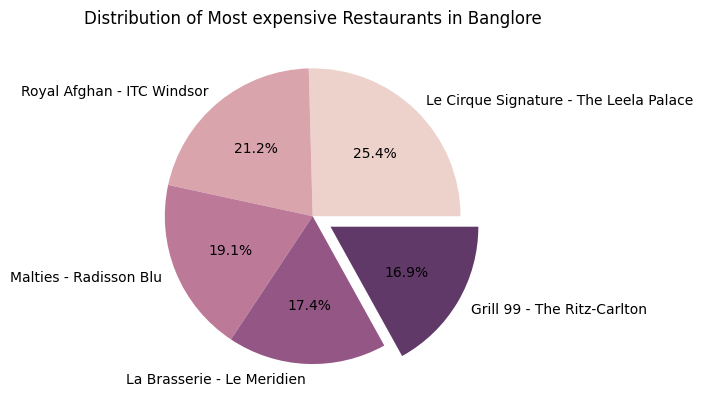

In [282]:
colors=sns.cubehelix_palette()
explode=[0.0,0.0,0.0,0.0,0.14]
plt.pie(exp.values, labels=exp.index, autopct="%1.1f%%",colors=colors,explode=explode)
plt.title("Distribution of Most expensive Restaurants in Banglore")
plt.show()

### **4. Top 5 most common locations where most restaurants are located**

In [283]:
city=df['location'].value_counts().head(5)
print(city)

location
BTM                      3900
Koramangala 5th Block    2297
HSR                      2004
Indiranagar              1803
JP Nagar                 1717
Name: count, dtype: int64


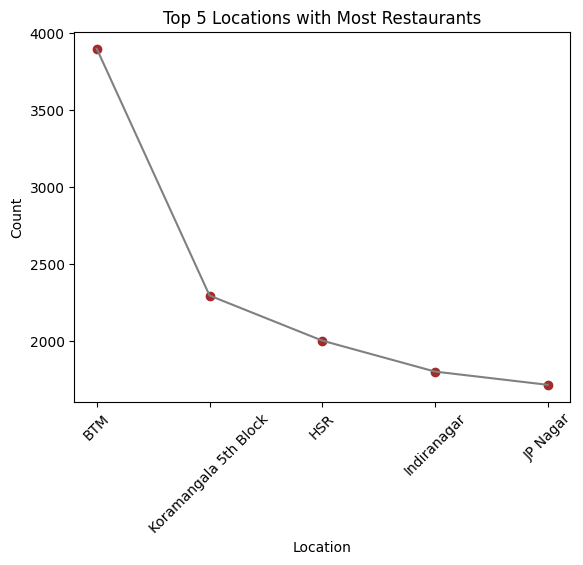

In [284]:
colors = ["brown", "brown", "brown", "brown", "brown"]

for i, (loc, val) in enumerate(zip(city.index, city.values)):
    plt.plot(loc, val, marker='o', color=colors[i])
    
plt.plot(city.index, city.values, color="gray")  # connect points with line

plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Top 5 Locations with Most Restaurants")
plt.xticks(rotation=45)
plt.show()





In [285]:
df['online_order'] = df['online_order'].map({'Yes':1, 'No':0})
df['book_table'] = df['book_table'].map({'Yes':1, 'No':0})




C:\Users\Sheenu\AppData\Local\Temp\ipykernel_4288\4137262385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['online_order'] = df['online_order'].map({'Yes':1, 'No':0})
C:\Users\Sheenu\AppData\Local\Temp\ipykernel_4288\4137262385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book_table'] = df['book_table'].map({'Yes':1, 'No':0})


## **Model 1 - Linear Regression**

In [286]:
model1 = LinearRegression()

x = df[['online_order','book_table','votes','approx_cost(for two people)']]
y = df['rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale train & test properly
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train model
model1.fit(x_train_scaled, y_train)

# Predict using scaled test data
pred = model1.predict(x_test_scaled)

# Correct score order
print("R2 Score :", r2_score(y_test, pred))
print("Mean Squared Error :", mean_squared_error(y_test, pred))


R2 Score : 0.28142365931715196
Mean Squared Error : 0.14067132614794686


### **CONCLUSION :**

R² Score = 0.2814 → Only ~28% of the variance in restaurant ratings is explained by the features.

MSE = 0.1406 → Average squared error is relatively high.

Conclusion: Linear Regression performs poorly on this dataset because the relationship between features (votes, online_order, etc.) and ratings is non-linear, and linear regression cannot capture complex patterns

## **Model 2 - Random Forest Regressor**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np




# Select numerical + dummy columns for X
feature_cols = ['online_order', 'book_table', 'votes_log', 'value_for_money']
x = df[feature_cols]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(random_state=42)

params = {
    'n_estimators': [100, 200, 300, 500, 700],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

search = RandomizedSearchCV(
    rf, params, n_iter=20, cv=5, 
    scoring='r2', n_jobs=-1, random_state=42,
    verbose=2
)
search.fit(x_train, y_train)

best_model = search.best_estimator_
pred = best_model.predict(x_test)


print("Best Params:", search.best_params_)
print("R2 Score:", r2_score(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))




C:\Users\Sheenu\AppData\Local\Temp\ipykernel_4288\1436489308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['votes_log'] = np.log1p(df['votes']) #This makes high-vote restaurants more influential.
C:\Users\Sheenu\AppData\Local\Temp\ipykernel_4288\1436489308.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value_for_money'] = 1 / df['approx_cost(for two people)']


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50}
R2 Score: 0.704635865530417
MSE: 0.05782164279566085


### **CONCLUSION :**

R² Score = 0.7046 → ~70% of the variance is explained.

MSE = 0.0578→ Smallest error among all three models.

Conclusion: Random Forest performs the best. It captures non-linear relationships and interactions between features very well. The predictions are accurate, and the error is low.

## **Model 3 - Light GBM**

In [288]:
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    boosting_type='gbdt'
)
x = df[['online_order','book_table','votes','approx_cost(for two people)']]
y = df['rate']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
model.fit(x_train, y_train)

pred = model.predict(x_test)


mse = mean_squared_error(y_test, pred)
print("MSE:", mse)
print("R2 Score :", r2_score(y_test, pred))
print("Mean Squared Error :", mean_squared_error(y_test, pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 33112, number of used features: 4
[LightGBM] [Info] Start training from score 3.702476
MSE: 0.08769342815744265
R2 Score : 0.552045008511288
Mean Squared Error : 0.08769342815744265


### **CONCLUSION :**

R² Score = 0.5520 → ~55% of the variance is explained.

MSE = 0.0678 → Better than Linear Regression but worse than Random Forest.

Conclusion: LightGBM performs decently, but in your current configuration, it underperforms compared to Random Forest. This could be improved by hyperparameter tuning (learning rate, num_leaves, max_depth, boosting rounds).

### **FINAL CONCLUSION :**

**Random Forest** is currently the **best performing model** for predicting Zomato restaurant ratings.

Linear Regression is too simple for this dataset; it cannot capture non-linear patterns.

LightGBM is better than Linear Regression but needs tuning to match or outperform Random Forest.

Overall, **tree-based models** (Random Forest, LightGBM) are **more suitable than linear models** for this type of dataset because of non-linear relationships between features and ratings.

In [289]:
import joblib 
joblib.dump(best_model,'model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']